## НТ 1

### Задание
1. Разбейте исходную таблицу на 2: по полу пассажиров. 
2. Удалите пустые строки или заполните их соответствующими символами.
3. Построить гистограмму распределения пассажиров по возрасту.
4. Вычислите мин и макс, среднее, моду, медиану возраста пассажира каждого пола.
5. Визуализировать возраст при помощи различных настроек метода plot.
6. Изменение типов данных таблицы

    my_series = pd.to_numeric(my_series)

    s = s.astype(np.float16) # for series

    df.drop(columns=['col1', 'col2']) # drop columns

    df.drop([0, 1])# drop rows

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [71]:
df = pd.read_csv("titanic.csv")
display(df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Проверим исходную таблицу на наличие пустых значений

In [72]:
nan_values = df.isna().any()
print("Признаки с пропущенными значениями:")
print(nan_values[nan_values].index.tolist())
print("\nКоличество пропущенных значений в каждом столбце:")
print(df.isna().sum())

Признаки с пропущенными значениями:
['Age', 'Cabin', 'Embarked']

Количество пропущенных значений в каждом столбце:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Удалим строки с пустыми значениями и проверим

In [73]:
df.dropna(inplace=True)
print("После удаления \n")
print(df.info())

После удаления 

<class 'pandas.core.frame.DataFrame'>
Index: 183 entries, 1 to 889
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  183 non-null    int64  
 1   Survived     183 non-null    int64  
 2   Pclass       183 non-null    int64  
 3   Name         183 non-null    object 
 4   Sex          183 non-null    object 
 5   Age          183 non-null    float64
 6   SibSp        183 non-null    int64  
 7   Parch        183 non-null    int64  
 8   Ticket       183 non-null    object 
 9   Fare         183 non-null    float64
 10  Cabin        183 non-null    object 
 11  Embarked     183 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.6+ KB
None


Разделим таблицу на две по полу пассажиров

In [74]:
male_df = df_cleaned[df_cleaned['Sex'] == 'male']
display(male_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S
27,28,0,1,"Fortune, Mr. Charles Alexander",male,19.0,3,2,19950,263.0000,C23 C25 C27,S
54,55,0,1,"Ostby, Mr. Engelhart Cornelius",male,65.0,0,1,113509,61.9792,B30,C


In [75]:
female_df = df_cleaned[df_cleaned['Sex'] == 'female']
display(female_df.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
52,53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1,0,PC 17572,76.7292,D33,C


Построим гистограмму расспределения пассажиров по возрасту

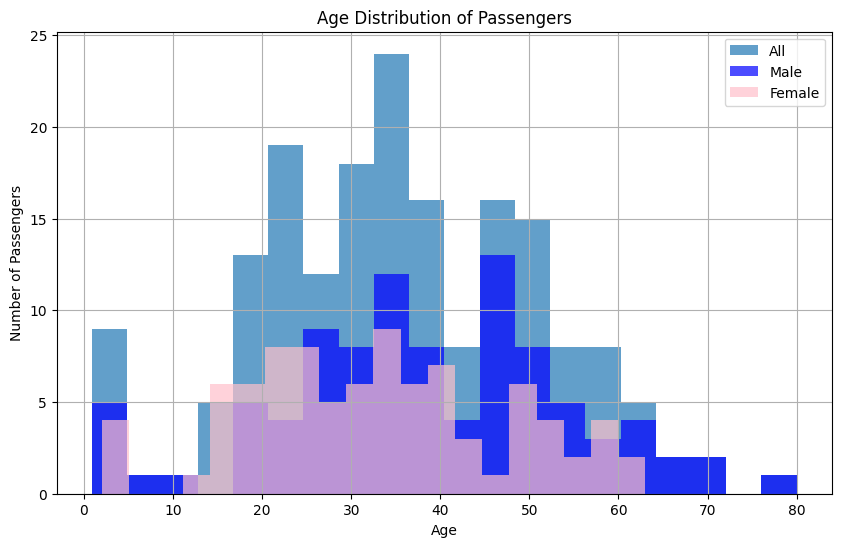

In [76]:
plt.figure(figsize=(10, 6))
df_cleaned['Age'].hist(bins=20, alpha=0.7, label='All')
male_df['Age'].hist(bins=20, alpha=0.7, label='Male', color='blue')
female_df['Age'].hist(bins=20, alpha=0.7, label='Female', color='pink')
plt.xlabel('Age')
plt.ylabel('Number of Passengers')
plt.title('Age Distribution of Passengers')
plt.legend()
plt.show()

Вычислим мин, макс, среднее, моду, медиану возраста пассажиров каждого пола

In [77]:
def calculate_age_stats(df, gender):
    min_age = df['Age'].min()
    max_age = df['Age'].max()
    mean_age = df['Age'].mean()
    median_age = df['Age'].median()
    mode_age = df['Age'].mode()[0]
    print(f"{gender.capitalize()} Age Statistics:")
    print(f"Min: {min_age}, Max: {max_age}, Mean: {mean_age:.2f}, Median: {median_age}, Mode: {mode_age}\n")

calculate_age_stats(male_df, 'male')
calculate_age_stats(female_df, 'female')

Male Age Statistics:
Min: 0.92, Max: 80.0, Mean: 38.45, Median: 37.0, Mode: 36.0

Female Age Statistics:
Min: 2.0, Max: 63.0, Mean: 32.68, Median: 32.25, Mode: 24.0



Визуализируем возраст при помощи различных настроек метода plot

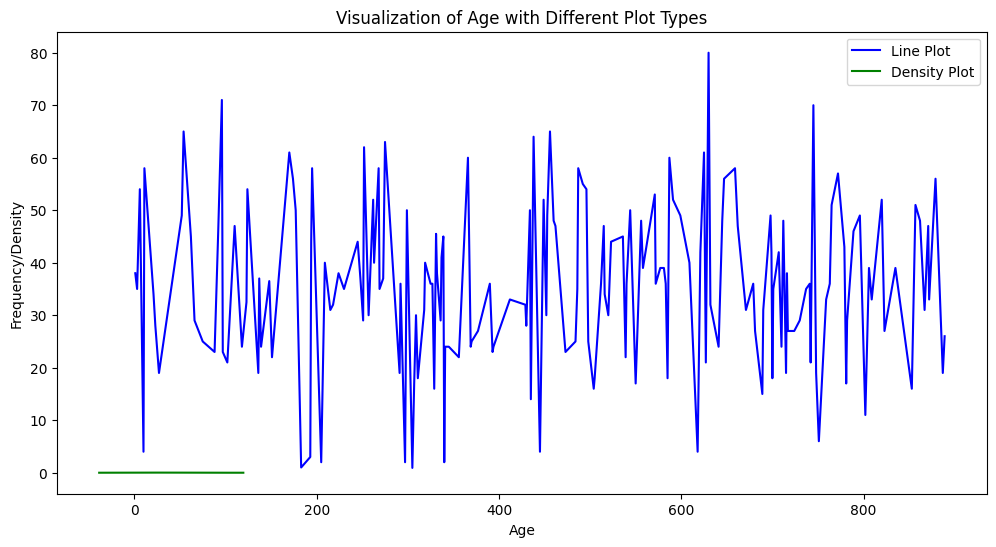

In [78]:
plt.figure(figsize=(12, 6))
df_cleaned['Age'].plot(kind='line', label='Line Plot', color='blue')
df_cleaned['Age'].plot(kind='density', label='Density Plot', color='green')
plt.title('Visualization of Age with Different Plot Types')
plt.xlabel('Age')
plt.ylabel('Frequency/Density')
plt.legend()
plt.show()

In [79]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')  # Преобразуем значения в числовой тип (NaN для некорректных данных)
df['Age'] = df['Age'].astype(np.float16)  # Уменьшаем размер данных
print(df.dtypes)
df = df.drop(columns=['Cabin', 'Ticket'])  # Удаляем колонки 'Cabin' и 'Ticket'

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float16
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [80]:
display(df.head())  # Вывод первых строк таблицы после изменений

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,16.7000,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,26.5500,S
